In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from nltk.corpus import stopwords
import nltk 
from nltk.tokenize import word_tokenize, RegexpTokenizer

# Data Reading and visualization

In [2]:
test =pd.read_csv(r"C:\Users\ASUS\Desktop\read\project\Sentiment_Analysis_Dataset\test.csv", encoding='latin1')
train = pd.read_csv(r"C:\Users\ASUS\Desktop\read\project\Sentiment_Analysis_Dataset\train.csv",encoding='latin1')

In [3]:
train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


# Data Preprocessing

In [ ]:
# Seperating Text column and Sentiment

In [4]:
train = train[['text','sentiment']]
train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
# Checking for null values

In [5]:
train.isna().sum()

text         1
sentiment    0
dtype: int64

In [6]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


In [7]:
test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [8]:
test = test[['text','sentiment']]
test.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [9]:
test.isna().sum()

text         1281
sentiment    1281
dtype: int64

In [10]:
test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 3533
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3534 non-null   object
 1   sentiment  3534 non-null   object
dtypes: object(2)
memory usage: 82.8+ KB


In [11]:
# word tokenize = seperting each word by ","
train_tokens = [word_tokenize(i) for i in train['text']]
train_tokens[:5]

[['I', '`', 'd', 'have', 'responded', ',', 'if', 'I', 'were', 'going'],
 ['Sooo',
  'SAD',
  'I',
  'will',
  'miss',
  'you',
  'here',
  'in',
  'San',
  'Diego',
  '!',
  '!',
  '!'],
 ['my', 'boss', 'is', 'bullying', 'me', '...'],
 ['what', 'interview', '!', 'leave', 'me', 'alone'],
 ['Sons',
  'of',
  '*',
  '*',
  '*',
  '*',
  ',',
  'why',
  'couldn',
  '`',
  't',
  'they',
  'put',
  'them',
  'on',
  'the',
  'releases',
  'we',
  'already',
  'bought']]

In [12]:
test_tokens = [word_tokenize(i) for i in test['text']]
test_tokens[:5]

[['Last', 'session', 'of', 'the', 'day', 'http', ':', '//twitpic.com/67ezh'],
 ['Shanghai',
  'is',
  'also',
  'really',
  'exciting',
  '(',
  'precisely',
  '--',
  'skyscrapers',
  'galore',
  ')',
  '.',
  'Good',
  'tweeps',
  'in',
  'China',
  ':',
  '(',
  'SH',
  ')',
  '(',
  'BJ',
  ')',
  '.'],
 ['Recession',
  'hit',
  'Veronique',
  'Branquinho',
  ',',
  'she',
  'has',
  'to',
  'quit',
  'her',
  'company',
  ',',
  'such',
  'a',
  'shame',
  '!'],
 ['happy', 'bday', '!'],
 ['http', ':', '//twitpic.com/4w75p', '-', 'I', 'like', 'it', '!', '!']]

In [13]:
# revmovel of punchuation
removal = RegexpTokenizer(r"\w+")


In [14]:
new_train = [removal.tokenize(i) for i in train['text']]
new_test = [removal.tokenize(i) for i in test['text']]

In [15]:
new_train[:5]

[['I', 'd', 'have', 'responded', 'if', 'I', 'were', 'going'],
 ['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego'],
 ['my', 'boss', 'is', 'bullying', 'me'],
 ['what', 'interview', 'leave', 'me', 'alone'],
 ['Sons',
  'of',
  'why',
  'couldn',
  't',
  'they',
  'put',
  'them',
  'on',
  'the',
  'releases',
  'we',
  'already',
  'bought']]

In [16]:
# removing stopwords
sw = set(stopwords.words('english'))

In [17]:
updated_train = [[word for word in i if not word in sw] for i in new_train]
updated_test = [[word for word in i if not word in sw] for i in new_test]

In [18]:
updated_train[:4]

[['I', 'responded', 'I', 'going'],
 ['Sooo', 'SAD', 'I', 'miss', 'San', 'Diego'],
 ['boss', 'bullying'],
 ['interview', 'leave', 'alone']]

In [ ]:
# joining the words 

In [19]:
dummy_train = [" ".join(i) for i in updated_train]
dummy_test = [" ".join(i) for i in updated_test]
dummy_train[:5]

['I responded I going',
 'Sooo SAD I miss San Diego',
 'boss bullying',
 'interview leave alone',
 'Sons put releases already bought']

In [20]:
train["text"]= dummy_train
test["text"]= dummy_test

In [ ]:
# Checking the Numbers of sentiment

In [21]:
train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [22]:
test['sentiment'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

### It show that there is Three labels dataset

In [23]:
print(train.shape)
print(test.shape)

(27480, 2)
(3534, 2)


In [24]:
# fit on tokenizer
tokenizer = Tokenizer()

In [25]:
tokenizer.fit_on_texts(train['text'])
tokenizer.fit_on_texts(test['text'])

### Converting text into a sequence of numbers

In [26]:
train_tokens = tokenizer.texts_to_sequences(train['text'])
test_tokens = tokenizer.texts_to_sequences(test['text'])

In [27]:
train_tokens[:4]

[[1, 7678, 1, 12],
 [340, 54, 1, 36, 1402, 2200],
 [1360, 11213],
 [1141, 271, 415]]

In [28]:
test_tokens[:4]

[[39, 1129, 2, 7, 80, 19, 26032],
 [26033, 176, 21, 834, 9299, 26034, 5448, 3, 1463, 2165, 4082, 26035],
 [4031, 375, 26036, 26037, 1569, 836, 738],
 [15, 672]]

In [29]:
# length of total words
no_words = len(tokenizer.word_index)+1
no_words

27905

In [30]:
X_train = tokenizer.texts_to_sequences(train['text'])
X_test = tokenizer.texts_to_sequences(test['text'])

In [31]:
# Total number of words in one sentence
max_length = max([len(i) for i in X_train])
max_length

41

### Padding : adding extra tokens '0' in required input to make all input variables fixed same shape and size

In [32]:

X_train = pad_sequences(X_train, maxlen=max_length, padding="post")
X_test = pad_sequences(X_test, maxlen=max_length, padding="post")
X_train[:1]

array([[   1, 7678,    1,   12,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])

In [33]:
y_train = train['sentiment']
y_test = test['sentiment']
type(y_test)

pandas.core.series.Series

In [34]:
# Number of classes
print(y_train.unique())
print(y_test.unique())

['neutral' 'negative' 'positive']
['neutral' 'positive' 'negative']


### It shows that there is three classes in this Dataset

### Converting classes from categorical to numeric by using OneHotEncoder

In [35]:
encoder = OneHotEncoder()

# Reshape the target labels 
y_train_reshaped = y_train.values.reshape(-1, 1)  
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit the encoder to the training labels and transform them
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)

# Convert the sparse matrix to a dense NumPy array
y_train_encoded = y_train_encoded.toarray()
y_test_encoded = y_test_encoded.toarray()

### Mapping labels to know which label corresponds to which label

In [67]:
categories = encoder.categories_[0]  
# Map the categories to their corresponding indices
label_mapping = {index: label for index, label in enumerate(categories)}
print("Label mapping:")
for index, label in label_mapping.items():
    print(f"Number {index} corresponds to label '{label}'")

Label mapping:
Number 0 corresponds to label 'negative'
Number 1 corresponds to label 'neutral'
Number 2 corresponds to label 'positive'


# Building Model

In [45]:
# Build the model
model = Sequential([
    Embedding(input_dim=no_words, output_dim=128, input_length=max_length),
    SimpleRNN(64, activation="relu",return_sequences=True),
    SimpleRNN(32, activation="relu",return_sequences=True),
    SimpleRNN(16, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(3, activation='softmax')  # 3 sentiment categories
])

### Compiling a Model 

In [46]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

### Fitting the training data and validation data into the model

In [47]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
430/430 [==============================] - 25s 47ms/step - loss: 1.0883 - accuracy: 0.4045 - val_loss: 1.0886 - val_accuracy: 0.4046
Epoch 2/10
430/430 [==============================] - 20s 46ms/step - loss: 1.0881 - accuracy: 0.4045 - val_loss: 1.0855 - val_accuracy: 0.4046
Epoch 3/10
430/430 [==============================] - 20s 46ms/step - loss: 1.0009 - accuracy: 0.4917 - val_loss: 0.9198 - val_accuracy: 0.5518
Epoch 4/10
430/430 [==============================] - 20s 46ms/step - loss: 0.8689 - accuracy: 0.5707 - val_loss: 0.8260 - val_accuracy: 0.6423
Epoch 5/10
430/430 [==============================] - 20s 46ms/step - loss: 0.7832 - accuracy: 0.6237 - val_loss: 0.7688 - val_accuracy: 0.6740
Epoch 6/10
430/430 [==============================] - 20s 46ms/step - loss: 0.6130 - accuracy: 0.7526 - val_loss: 0.7618 - val_accuracy: 0.6969
Epoch 7/10
430/430 [==============================] - 20s 46ms/step - loss: 0.5265 - accuracy: 0.7961 - val_loss: 0.7954 - val_accuracy:

### Visualization of training accuracy and validation accuracy

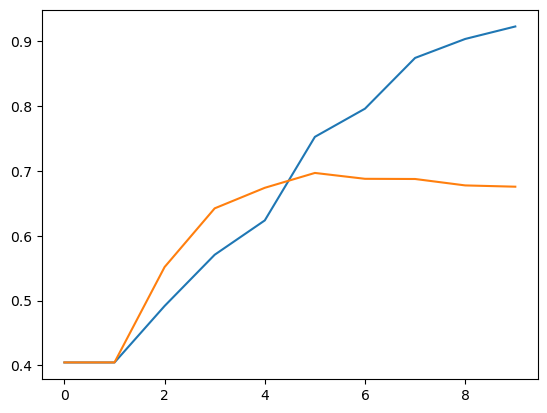

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

### Validation accuracy is not increasing with training accuracy

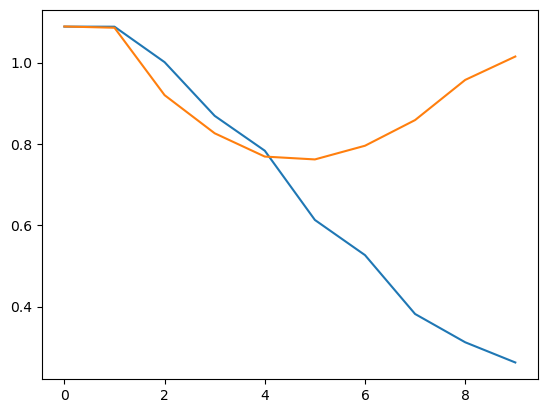

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

- The validation loss is not decreasing along with the training loss. 
- Although the model achieves higher accuracy during training, it does not generalize well to the validation data.

### predecting the sentiments of sentence to check model working accuracy

In [57]:
predicted_class_index = predictions.argmax(axis=-1)

In [69]:
# Prediction

texts = [
    "The movie was bad bad bad, i will not recommend this movie to anyone",
    "I loved the movie, it was fantastic",
    "The book was okay, but could have been better"
]
predicted_sentiments = []
for text in texts:
    new_text_seq = tokenizer.texts_to_sequences([text])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=max_length) 
    predictions = model.predict(new_text_padded)
    predicted_class_index = np.argmax(predictions, axis=-1)[0]
    if predicted_class_index == 0:
        predicted_sentiment = "Negative"
    elif predicted_class_index == 1:
        predicted_sentiment = "Neutral"
    else:
        predicted_sentiment = "Positive"
    predicted_sentiments.append(predicted_sentiment)

for i, text in enumerate(texts):
    print(f"Text {i + 1}: {text} - Predicted sentiment: {predicted_sentiments[i]}")

1/1 [==============================] - 0s 44ms/step
Text 1: The movie was bad bad bad, i will not recommend this movie to anyone - Predicted sentiment: Negative
Text 2: I loved the movie, it was fantastic - Predicted sentiment: Positive
Text 3: The book was okay, but could have been better - Predicted sentiment: Positive


### The model is providing accurate predictions